# Postprocessing a DeepONet Trained for a 0D Reactor

In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import tensorflow                         as tf
from tensorflow                           import keras

import romnet                             as rmnt


In [2]:
### Input Data

ROMNetFldr    = WORKSPACE_PATH + '/ROMNet/romnet/'

OutputDir     = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_2000Cases_New/'
TestDir       = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_2000Cases_New/'

PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_Isobaric_2000Cases_New/DeepONet/Deterministic/Run_13/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_10Cases/DeepONet/MCDropOut/Run_1/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_10Cases/DeepONet/BayesByBackprop/Run_1/'

DirDir        = OutputDir

# DirName       = 'test'
# CasesVec      = range(5)#[1,0,2]
DirName       = 'train'
CasesVec      = range(10)



NSamples      = 1

NVarsRed      = 7

FixedMinVal   = 1.e-14 

POD_NAME      = 'All'


scale  = 'log10'
MinVal = 1.e-40

In [3]:
print("\n[ROMNet]: Reading Input File from: ", PathToRunFld)
sys.path.insert(0, PathToRunFld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH, ROMNetFldr)


InputData.InputFilePath = PathToRunFld+'/ROMNet_Input.py'
InputData.TrainIntFlg   = 0
InputData.PathToRunFld  = PathToRunFld


[ROMNet]: Reading Input File from:  /Users/sventur/WORKSPACE//ROMNet/0DReact_Isobaric_2000Cases_New/DeepONet/Deterministic/Run_13/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


In [4]:
SurrogateType = InputData.SurrogateType
if (SurrogateType == 'FNN-SourceTerms'):
    SurrogateType = 'FNN'

Net   = getattr(rmnt.nn, SurrogateType)

model = rmnt.model.Model_Deterministic(InputData)

if (InputData.PhysSystem is not None):
    System = getattr(rmnt.pinn.system, InputData.PhysSystem)
    system = System(InputData)

model.build(InputData, None, Net, system)#, loadfile_no='000034')

NN    = model.net


[ROMNet - model_deterministic.py    ]:   Initializing the ML Model

[ROMNet - model_deterministic.py    ]:   Building the ML Model

[ROMNet - deeponet.py               ]:   Constructing Deep Operator Network: 
self.C =  [[ 2.12691969e+03  4.29730911e-02  1.46183655e-03  1.63791130e-03
   9.14955138e-02  6.19421358e-03  1.23105291e-01  5.27722476e-06
   2.27330601e-07  2.28790090e-15  5.90905661e-07  1.72693783e-07
   9.85756818e-08  3.17633690e-07  5.43422183e-08  1.53413562e-03
   4.55768578e-07  1.41577751e-07  1.52601152e-07 -4.46966375e-16
   7.31590519e-01]]
self.D =  [[2.49377346e+01 1.64298232e-01 4.51490524e-02 5.81450030e-02
  3.13615345e-01 8.77214764e-02 3.22406605e-01 3.67049761e-03
  6.84398212e-04 6.21625484e-07 1.05658289e-03 5.43015301e-04
  4.03071320e-04 7.74766470e-04 2.52500439e-04 6.01262668e-02
  1.27623161e-03 5.48168342e-04 5.43559089e-04 4.49454661e-07
  1.37117353e-01]]
[ROMNet - system_of_components.py   ]:     Mapping Branch-to-Trunk (i.e., self.branch_to_t


[ROMNet - model_deterministic.py    ]:   Loading ML Model Parameters from File:  /Users/sventur/WORKSPACE//ROMNet/0DReact_Isobaric_2000Cases_New/DeepONet/Deterministic/Run_13//Training/Params//001213.h5
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_1
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_1
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_2
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_2
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_3
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_3
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_4
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Branch_1-Main-HL_4
[ROMNet - hdf5_forma

[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_6-Main-HL_2
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_6-Main-HL_3
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_6-Main-HL_3
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_6-Main-HL_4
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_6-Main-HL_4
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_7-Main-HL_1
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_7-Main-HL_1
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_7-Main-HL_2
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_7-Main-HL_2
[ROMNet - hdf5_format.py            ]:     Loaded Weights for Layer  DeepONet-Trunk_7-Main-HL_3
[ROMNet - hdf5_format.py            ]:  

In [5]:
# FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
# A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

# FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
# C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

# FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
# D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

# FileName    = OutputDir+'/'+str(NVarsRed)+'PC/ROM/ToOrig_Mask.csv'
# ToOrig_Mask = pd.read_csv(FileName, delimiter=',', header=None).to_numpy(int)[:,0]

In [6]:
### Evaluating on Test Data


FileName = DirDir + '/Orig/train/ext/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)
VarNames.remove('t')

FileName     = DirDir + '/Orig/train/ext/CleanVars.csv'
Data         = pd.read_csv(FileName, header=0)
Vars         = list(Data.columns)
Vars0        = []
for Var in Vars:
    Vars0.append(str(Var)+'0')
        
    
FileName     = OutputDir + '/Orig/'+DirName+'/ext/SimIdxs.csv'
Data         = pd.read_csv(FileName, header=0)
SimIdxs      = Data.to_numpy(int)

FileName     = OutputDir + '/Orig/'+DirName+'/ext/ICs.csv'
Data         = pd.read_csv(FileName)
ICVecs       = Data.to_numpy()
NICs         = len(ICVecs)

In [7]:
InputVars = Vars0+['t']
#InputVars = ['T0']+['t']
InputVars

['T0',
 'H20',
 'H0',
 'O0',
 'O20',
 'OH0',
 'H2O0',
 'HO20',
 'H2O20',
 'CO0',
 'N0',
 'NH0',
 'NH20',
 'NH30',
 'NNH0',
 'NO0',
 'NO20',
 'N2O0',
 'HNO0',
 'HNCO0',
 'N20',
 't']

T =  1092.25 K


Text(0, 0.5, 'H')

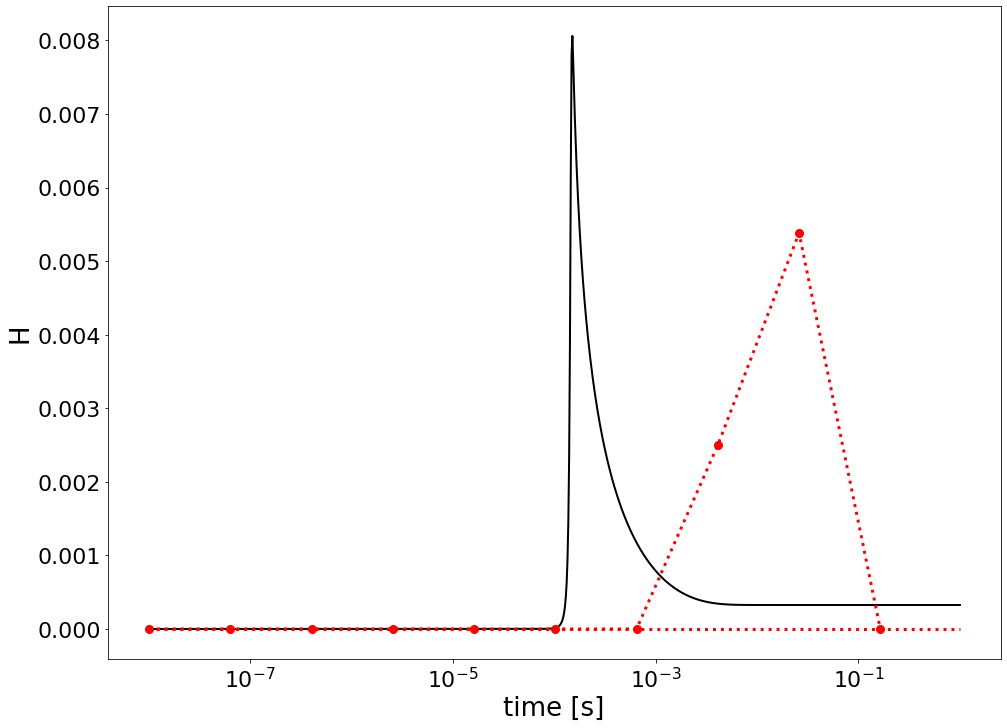

In [17]:
VarOI    = 'H'


iVar     = Vars.index(VarOI)


ax  = []

fig = plt.figure(figsize=(16,12))
ax.append(plt.axes())

for iTest in [0]:#CasesVec:
    Nts              = SimIdxs[iTest,1]-SimIdxs[iTest,0]
    P0Vec            = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,0]
    EqRatio0Vec      = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,1]
    T0Vec            = np.ones(Nts, dtype=np.float64)*ICVecs[iTest,2]
    
    
    #####################################################################################################
    FileName     = DirDir + '/Orig/'+DirName+'/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    tVec[tVec == 0.] = FixedMinVal
    y_Data       = Data[Vars].to_numpy()
    print('T = ', Data['T'].to_numpy()[0], 'K')
    
    ax[0].plot(tVec, y_Data[:,iVar],  '-k',  label='From ODE', lw=2)
    #####################################################################################################
    
    
    #####################################################################################################
    Data0            = pd.DataFrame([y_Data[1,:]], columns=Vars0)
    Data0            = Data0.loc[Data0.index.repeat(Nts)]
    Data0.columns    = Vars0
    Data0['T0']      = T0Vec
    Data0['t']       = tVec
    Data0.reset_index(drop=True, inplace=True)

    y_Pred           = model.predict(Data0[InputVars])
    
    ax[0].plot(tVec, y_Pred[:,iVar], 'r:', label='DeepONet', lw=3)
    #####################################################################################################
    
    
    #####################################################################################################
    Data0            = pd.DataFrame([y_Data[1,:]], columns=Vars0)
    Data0            = Data0.loc[Data0.index.repeat(Nts)]
    Data0.columns    = Vars0
    Data0.reset_index(drop=True, inplace=True)
    
#     Idxs          = range(1,len(tVec),500)
#     tLoop         = tVec[Idxs]
#     NLoop         = len(tLoop)
#     yMatLoop      = np.zeros((NLoop,len(Vars)))
#     InputPredLoop = np.concatenate([Data0.loc[0].to_numpy()[np.newaxis,...], (tLoop[0])[np.newaxis,np.newaxis]], axis=1)
#     yMatLoop[0,:] = model.predict(InputPredLoop)
#     for it, tLoop_ in enumerate(tLoop[1:]):
#         InputPredLoop    = np.concatenate([y_Data[Idxs[it],:][np.newaxis,...], (tLoop[it+1]-tLoop[it])[np.newaxis,np.newaxis]], axis=1)
#         yMatLoop[it+1,:] = model.predict(InputPredLoop)
    
    Idxs          = range(1,len(tVec),100)
    tLoop         = tVec[Idxs]
    NLoop         = len(tLoop)
    yMatLoop      = np.zeros((NLoop,len(Vars)))
    InputPredLoop = np.concatenate([Data0.loc[0].to_numpy()[np.newaxis,...], (tLoop[0]-tVec[0])[np.newaxis,np.newaxis]], axis=1)
    for it in range(NLoop-1):
        #print('Deltat = ', tLoop[it+1]-tLoop[it])
        yMatLoop[it,:]  = model.predict(InputPredLoop)
        InputPredLoop   = np.concatenate([yMatLoop[it,:][np.newaxis,...], (tLoop[it+1]-tLoop[it])[np.newaxis,np.newaxis]], axis=1)
    yMatLoop[NLoop-1,:] = model.predict(InputPredLoop)
    
    ax[0].plot(tLoop, yMatLoop[:,iVar], 'or:', label='DeepONet', lw=3)
    #####################################################################################################
    
    
ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel(VarOI)

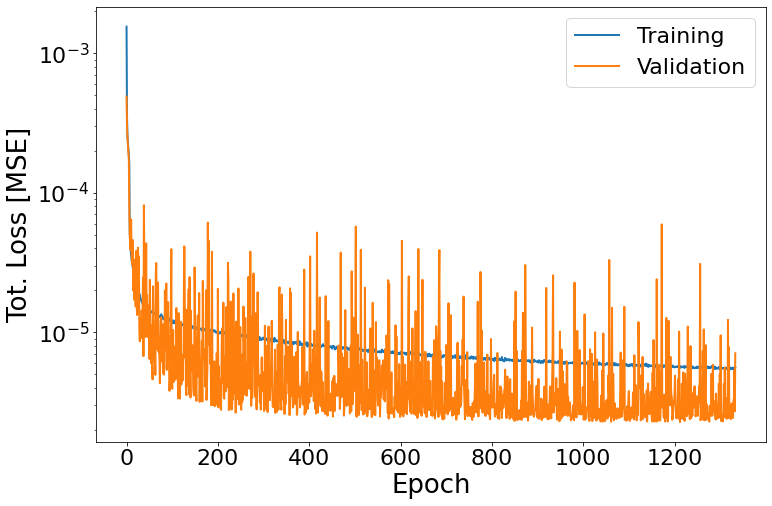

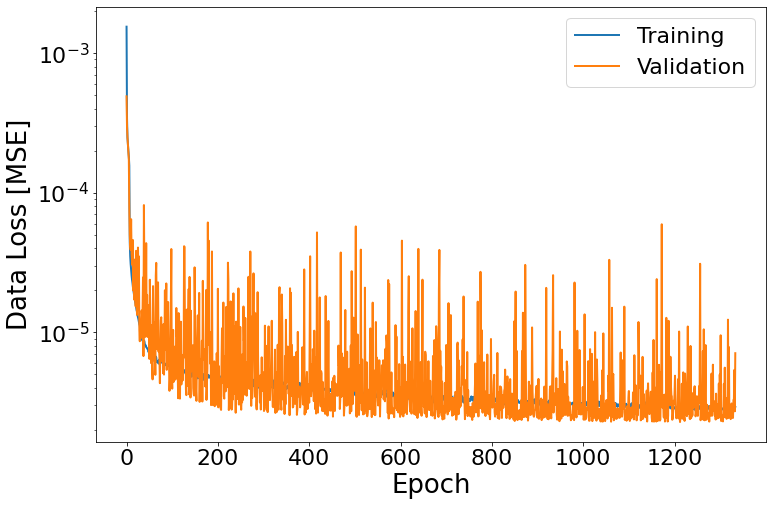

In [9]:
Data = pd.read_csv(PathToRunFld+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],     label='Training')
plt.plot(Data['val_tot_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['res_loss'],     label='Training')
# plt.plot(Data['val_res_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('Residual Loss [MSE]')
# plt.legend()
# plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],     label='Training')
plt.plot(Data['val_pts_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['scs_loss'],     label='Training')
# plt.plot(Data['val_scs_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('S.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')


# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

Text(0, 0.5, 'T')

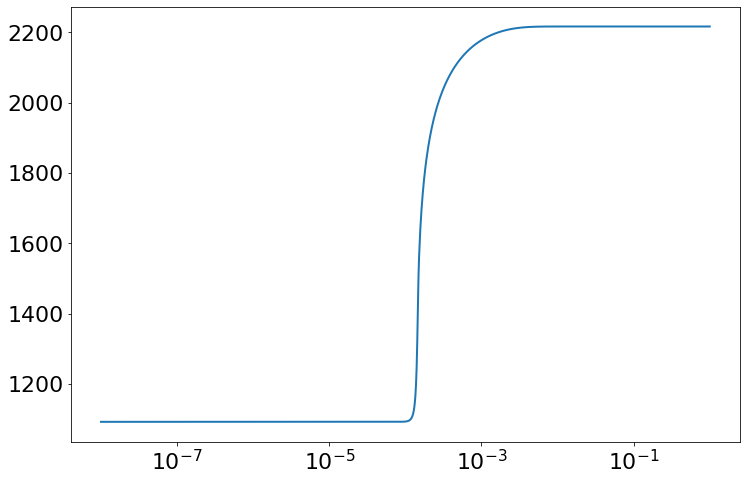

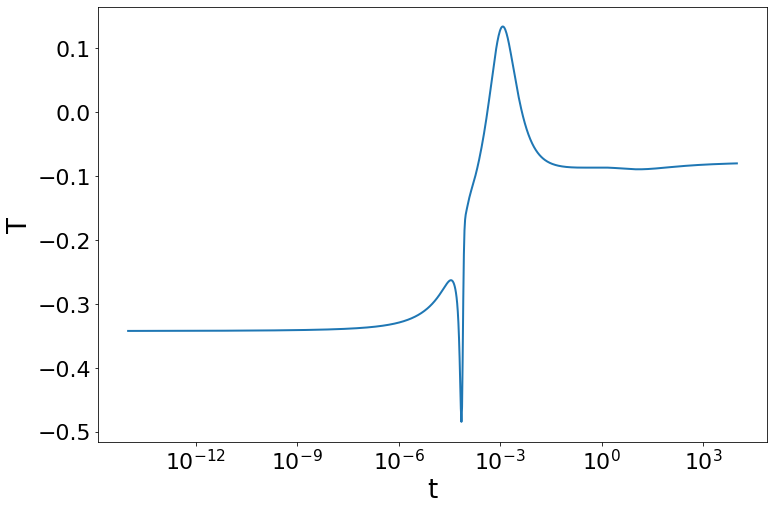

In [10]:
iTrunk           = 0
iTest            = 0

FileName         = OutputDir+'/Orig/'+DirName+'/ext/y.csv.'+str(iTest+1)
Data             = pd.read_csv(FileName, header=0)

fig = plt.figure(figsize=(12,8))
plt.plot(Data['t'], Data[Vars[iTrunk]])
plt.xscale('log')


iVarVec = range(1)

tVecTot = np.logspace(-14,4,1000)

output_ = model.net.system_of_components['DeepONet'].components['Trunk_'+str(iTrunk+1)].call(tVecTot[...,np.newaxis], model.net.layers_dict, None, None, training=False)



fig = plt.figure(figsize=(12,8))

for iVar in iVarVec:

    plt.plot(tVecTot, output_[:,iVar])

#plt.xlim([1.e-6, 1.e-2])
plt.xscale('log')
plt.xlabel('t')
plt.ylabel(Vars[iTrunk])

In [11]:
FileName     = OutputDir + '/Orig/train/ext/SimIdxs.csv'
Data         = pd.read_csv(FileName, header=0)
SimIdxs      = Data.to_numpy(int)


FileName     = OutputDir + '/Orig/train/ext/ICs.csv'
Data         = pd.read_csv(FileName)
ICVecs       = Data.to_numpy()
NICs         = len(ICVecs)

Cols   = []
NewFlg = True
for iC in range(NICs):

    Nts                  = SimIdxs[iC,1]-SimIdxs[iC,0]
    NtsNow               = Nts



    FileName             = OutputDir+'/Orig/'+DirName+'/ext/y.csv.'+str(iTest+1)
    Data                 = pd.read_csv(FileName, header=0)

    DataICTemp  = Data[Vars].iloc[0]

    if (NewFlg):
        DataIC           = DataICTemp
        NewFlg           = False
    else:
        DataIC           = pd.concat([DataIC, DataICTemp], axis=1)
        Cols.append(str(iC+1))

tVec              = Data['t']
DataIC            = DataIC.T.reset_index(drop=True, inplace=False)

Text(0.5, 0, '$\\alpha_{H2_D}$')

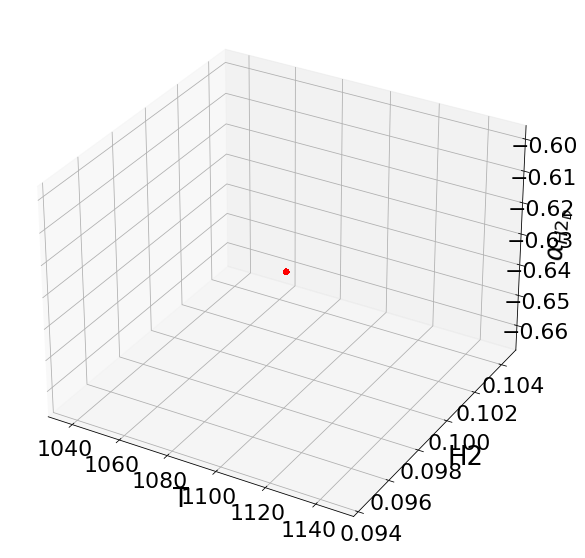

In [12]:
iBranch = 1
iVar    = 0

#InputData = DataIC.to_numpy()
InputData = model.net.layers_dict['DeepONet']['PCALayer'](DataIC.to_numpy())

output_   = model.net.system_of_components['DeepONet'].components['Branch_'+str(iBranch+1)].call(InputData, model.net.layers_dict, None, None, training=False)



#%matplotlib qt

fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')
ax.scatter(DataIC[Vars[0]], DataIC[Vars[1]], output_[:,iBranch], c='r')
ax.set_xlabel(Vars[0])
ax.set_ylabel(Vars[1])
#ax.set_zlabel(r'$\alpha_{'+str(iBranch+1)+'_{'+str(iVar+1)+'}}$')
ax.set_zlabel(r'$\alpha_{'+Vars[iBranch]+'_D}$')

In [13]:
DataIC

,T,H2,H,O,O2,OH,H2O,HO2,H2O2,CO,...,NH,NH2,NH3,NNH,NO,NO2,N2O,HNO,HNCO,N2
0,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
1,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
2,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
3,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
4,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
1996,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
1997,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557
1998,1092.25,0.099396,0.0,0.0,0.200047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700557


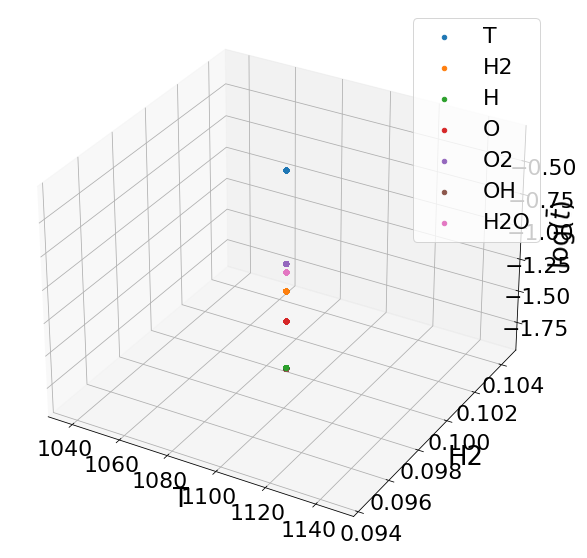

In [14]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

#InputData = DataIC.to_numpy()
InputData = model.net.layers_dict['DeepONet']['PCALayer'](DataIC.to_numpy())

output_ = model.net.system_of_components['DeepONet'].components['Rigid'].call(InputData, model.net.layers_dict, None, None, training=False)


for iBranch in range(InputData.shape[1]):
    ax.scatter(DataIC[Vars[0]], DataIC[Vars[1]], output_[:,iBranch], label=Vars[iBranch])

    
ax.set_xlabel(Vars[0])
ax.set_ylabel(Vars[1])
ax.set_zlabel(r'$\log(\bar{t})$')
ax.legend()
#ax.set_zscale('log')

In [15]:
# fig = plt.figure(figsize=(10,10))
# ax  = fig.add_subplot(projection='3d')


# output_ = model.net.system_of_components['DeepONet'].components['Rigid'].call(DataIC.to_numpy(), training=False)

# output_.shape

# for iBranch in range(7,14):
#     #ax.scatter(DataIC['PC_1'], DataIC['PC_2'], np.exp(output_[:,iBranch]))
#     ax.scatter(DataIC['PC_1'], DataIC['PC_2'], output_[:,iBranch], label=r'$\eta_{'+str(iBranch+1)+'}$')


# ax.set_xlabel(r'$\eta_{'+str(1)+'_0}$')
# ax.set_ylabel(r'$\eta_{'+str(2)+'_0}$')
# ax.set_zlabel(r'$\log(\bar{t})$')
# ax.legend()
# #ax.set_zscale('log')

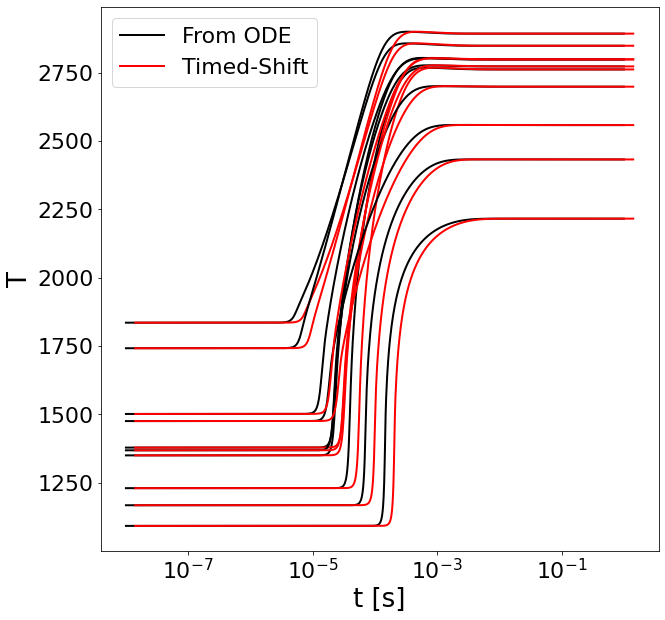

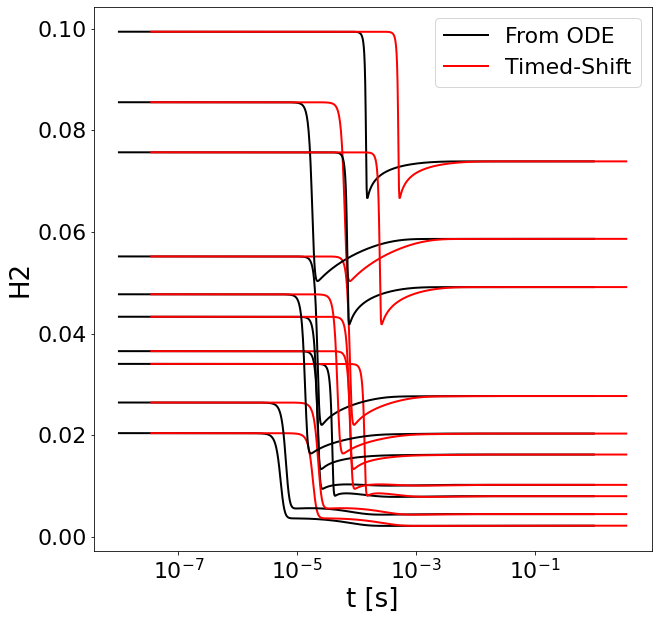

In [16]:
iPCVec   = [0,3]

iTestVec = np.arange(10)

for iVar in [0,1]:

    NewFlg = True
    fig    = plt.figure(figsize=(10,10))
    for iTest in iTestVec:
        
        FileName         = OutputDir+'/Orig/'+DirName+'/ext/y.csv.'+str(iTest+1)
        Data             = pd.read_csv(FileName, header=0)
        tVec             = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
        yPCA_Data        = Data[Vars].to_numpy()
        Data0            = Data[Data['t'] == 0.][Vars]
#         yPCA_Data        = ((y_Data[:,ToOrig_Mask] - C[:,0])/D[:,0]).dot(A.T)
#         yPre_Data        = yPCA_Data.dot(A)
#         yAnti_Data       = yPre_Data * D[:,0] + C[:,0]
#         Data0            = pd.DataFrame([yPCA_Data[1,:]], columns=Vars0)

        if NewFlg:
            Label1 = 'From ODE'
            Label2 = 'Timed-Shift'
            NewFlg = False
        else:
            Label1 = None
            Label2 = None

        plt.plot(tVec, yPCA_Data[:,iVar], '-k',  label=Label1, lw=2)
        plt.plot(np.exp(np.log(tVec+1.e-20)-output_[iTest,iVar]), yPCA_Data[:,iVar], '-r',  label=Label2, lw=2)
    
    axes1 = plt.gca()
    ylim  = axes1.get_ylim()
    #for iTest in iTestVec:

        #plt.vlines(np.exp(output_[iTest,iPC]), ylim[0], ylim[1], colors='r', linestyles='solid')

    plt.xscale('log')
    plt.legend()
    plt.xlabel('t [s]')
    plt.ylabel(Vars[iVar])
    #plt.xlim([1.e-8, 1.e-1])

In [20]:
a = np.random.rand(20,10)
a

array([[0.80769201, 0.14042818, 0.3534912 , 0.53286123, 0.375154  ,
        0.3245157 , 0.39494722, 0.22368645, 0.25327284, 0.16732347],
       [0.3950879 , 0.57723231, 0.419128  , 0.02678906, 0.91747375,
        0.17921932, 0.07212098, 0.74670637, 0.6994263 , 0.41812507],
       [0.2818333 , 0.49514284, 0.0151161 , 0.67707951, 0.84125434,
        0.88204331, 0.65489907, 0.27896172, 0.13819865, 0.46739554],
       [0.21240207, 0.28245626, 0.08905446, 0.66502337, 0.61669013,
        0.07207936, 0.99324888, 0.01910171, 0.18400494, 0.73714618],
       [0.00192899, 0.14524728, 0.86003946, 0.67459747, 0.92978831,
        0.83060334, 0.81360305, 0.66192673, 0.06215852, 0.77300639],
       [0.9492244 , 0.16320628, 0.07612035, 0.56616602, 0.63615251,
        0.85383592, 0.21740414, 0.76754655, 0.85932058, 0.87415506],
       [0.50575821, 0.18441457, 0.81780439, 0.83805839, 0.25662289,
        0.7131613 , 0.09776551, 0.76407378, 0.98429467, 0.71651587],
       [0.15702228, 0.4787503 , 0.1398567